### Loading up our saved models

In [1]:
using ONNXNaiveNASflux
using Random
using Flux, Statistics, ProgressMeter, Plots, TaijaData, Distances, MLDatasets, CSV, DataFrames
using Flux: onehotbatch, onecold, crossentropy, logitcrossentropy, mse, throttle, update!, push!

In [2]:
model_0 = ONNXNaiveNASflux.load("../models_new/model_0.onnx")
model_1 = ONNXNaiveNASflux.load("../models_new/model_1.onnx")
model_2 = ONNXNaiveNASflux.load("../models_new/model_2.onnx")
model_3 = ONNXNaiveNASflux.load("../models_new/model_3.onnx")
model_4 = ONNXNaiveNASflux.load("../models_new/model_4.onnx")
model_5 = ONNXNaiveNASflux.load("../models_new/model_5.onnx")
model_6 = ONNXNaiveNASflux.load("../models_new/model_6.onnx")
model_7 = ONNXNaiveNASflux.load("../models_new/model_7.onnx")
model_8 = ONNXNaiveNASflux.load("../models_new/model_8.onnx")
model_9 = ONNXNaiveNASflux.load("../models_new/model_9.onnx")
model_10 = ONNXNaiveNASflux.load("../models_new/model_10.onnx")

CompGraph with graphsummary:
┌────────────────┬───────────┬────────────────┬─────────────────────────┐
│ Graph Position │ Vertex Nr │ Input Vertices │ Op                      │
├────────────────┼───────────┼────────────────┼─────────────────────────┤
│ Input          │ 1         │                │                         │
│ Hidden         │ 2         │ 1              │ Dense(784 => 128, relu) │
│ Output         │ 3         │ 2              │ Dense(128 => 10)        │
└────────────────┴───────────┴────────────────┴─────────────────────────┘


### Loading up our MNIST data

In [3]:
train_df = CSV.read("../data/mnist_train.csv", DataFrame; header=false)
train_data = Matrix(train_df)

test_df = CSV.read("../data/mnist_test.csv", DataFrame; header=false)
test_data = Matrix(test_df)

x_train = train_data[:, 2:785]' ./ 255
y_train = train_data[:, 1]

x_test = test_data[:, 2:785]' ./ 255
y_test = test_data[:, 1]

x_train

784×60000 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮              ⋱            ⋮                   
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 

### Preparing models for Counterfactual generation

In [4]:
using CounterfactualExplanations

flux_0 = CounterfactualExplanations.MLP(model_0; likelihood=:classification_multi)
flux_1 = CounterfactualExplanations.MLP(model_1; likelihood=:classification_multi)
flux_2 = CounterfactualExplanations.MLP(model_2; likelihood=:classification_multi)
flux_3 = CounterfactualExplanations.MLP(model_3; likelihood=:classification_multi)
flux_4 = CounterfactualExplanations.MLP(model_4; likelihood=:classification_multi)
flux_5 = CounterfactualExplanations.MLP(model_5; likelihood=:classification_multi)
flux_6 = CounterfactualExplanations.MLP(model_6; likelihood=:classification_multi)
flux_7 = CounterfactualExplanations.MLP(model_7; likelihood=:classification_multi)
flux_8 = CounterfactualExplanations.MLP(model_8; likelihood=:classification_multi)
flux_9 = CounterfactualExplanations.MLP(model_9; likelihood=:classification_multi)
flux_10 = CounterfactualExplanations.MLP(model_10; likelihood=:classification_multi)

CounterfactualExplanations.Models.Model(CompGraph(3 vertices), :classification_multi, CounterfactualExplanations.Models.Fitresult(CompGraph(3 vertices), Dict{Any, Any}()), MLP())

In [42]:
using CounterfactualExplanations

flux_clean = CounterfactualExplanations.MLP(model; likelihood=:classification_multi)
flux_adv_strong = CounterfactualExplanations.MLP(adv_pgd_strong; likelihood=:classification_multi)
flux_adv_medium = CounterfactualExplanations.MLP(adv_pgd_medium; likelihood=:classification_multi) 
flux_adv_weak = CounterfactualExplanations.MLP(adv_pgd_weak; likelihood=:classification_multi)
flux_adv_medstr = CounterfactualExplanations.MLP(adv_pgd_medstr; likelihood=:classification_multi)
flux_adv_med2 = CounterfactualExplanations.MLP(adv_pgd_med2; likelihood=:classification_multi)

CounterfactualExplanations.Models.Model(CompGraph(3 vertices), :classification_multi, CounterfactualExplanations.Models.Fitresult(CompGraph(3 vertices), Dict{Any, Any}()), MLP())

### Plot random counterfactuals

In [6]:
counterfactual_data = CounterfactualData(x_train, y_train)
counterfactual_data.domain = [(0, 1) for var in counterfactual_data.features_continuous]
generator = CounterfactualExplanations.ECCoGenerator(; λ=[0.01, 0.1])
convergence = CounterfactualExplanations.GeneratorConditionsConvergence(decision_threshold=0.7, max_iter=1000)

CounterfactualExplanations.Convergence.GeneratorConditionsConvergence(0.7, 0.01, 1000, 0.75)

CounterfactualExplanation
Convergence: ❌ after 1000 steps.
image = [0.0, 4.1791768799370745e-6, 0.0, 9.113099119772983e-6, 0.0, 0.0, 5.415345970671837e-6, 5.58029875916688e-6, 1.1853856818433428e-5, 3.011585485523938e-6, 0.0, 1.37436050241746e-5, 0.0, 5.792820971262103e-6, 9.46021372651984e-6, 8.41482145101935e-6, 9.14579892299372e-6, 1.1804585693386827e-5, 7.415320626158462e-6, 4.0694096636428865e-6, 0.0, 0.0, 7.211876858548295e-6, 5.759454918763396e-6, 7.649643171880883e-6, 5.834413692440421e-6, 0.0, 4.8785614692903325e-6, 6.556836086613061e-6, 0.0, 1.259954452947909e-5, 0.0, 6.18912457159837e-6, 0.0, 7.097680887291347e-6, 0.0, 8.363229339192202e-6, 5.747375791731457e-6, 9.565300774827535e-6, 2.0377788826131392e-6, 0.0, 8.75960425696931e-6, 1.3397699958517251e-5, 5.8718944734081905e-6, 8.204537743328188e-6, 0.0, 5.742910469574981e-6, 9.86433021008537e-6, 9.268664011319318e-6, 6.036848346813173e-6, 1.1026214669662694e-5, 0.0, 4.8407267800421046e-6, 7.5411310397122126e-6, 1.59491194771

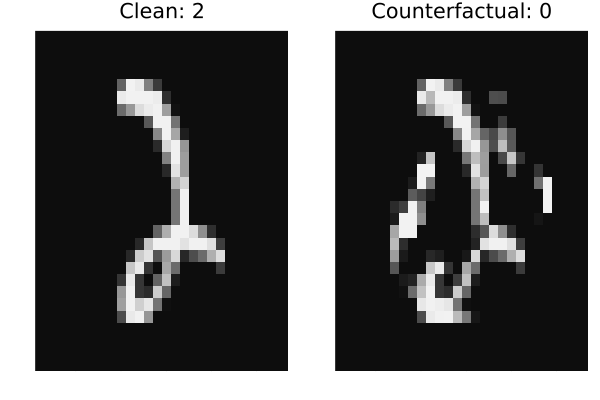

In [38]:
include("../utils/plot.jl")

using CounterfactualExplanations.Evaluation: evaluate, validity

# model_to_use = flux_clean
# model_to_use = flux_adv_strong
model_to_use = flux_adv_medstr
# model_to_use = flux_adv_medium
# model_to_use = flux_adv_weak

# random point's Counterfactual
index = rand(1:10000)

different_label = rand(0:8)
if different_label >= y_test[index]
    different_label += 1
end
 
ce = generate_counterfactual(
        reshape(x_test[:, index], 784, 1), different_label, counterfactual_data, model_to_use, generator; num_counterfactuals=1, convergence=convergence
    )

println(ce)

ces = CounterfactualExplanations.counterfactual(ce)
cfimage = ces[:, 1]
println("image = ", cfimage)
println("correct_class = ", ce.target)
println("also should be same: ", different_label)

# inf_model = model
# inf_model = adv_pgd_strong
inf_model = adv_pgd_medstr
# inf_model = adv_pgd_medium
# inf_model = adv_pgd_weak

cf_pred = (inf_model(cfimage) |> Flux.onecold |> getindex) - 1
println("valid? ", evaluate(ce; measure=validity)[1][1])
actualimage = x_test[:, index]
actual_pred = (inf_model(actualimage) |> Flux.onecold |> getindex) - 1
plot_normal_and_ce(actualimage, actual_pred, cfimage, cf_pred, y_test[index])

### Experimental Setup

In [5]:
Random.seed!(42)

function generate_split(num_datapoints)
    rand(1:num_datapoints, 200)
end

function random_excluding(exclude)
    value = rand(0:8)
    return value < exclude ? value : value + 1
end

split = generate_split(length(y_test))
targets = [random_excluding(y_test[num]) for num in split]

split
targets
# splits = [generate_split(length(y_test)) for _ in 1:5]
# targets = [[random_excluding(y_test[num]) for num in split] for split in splits]

200-element Vector{Int64}:
 7
 8
 7
 8
 5
 7
 7
 8
 0
 3
 ⋮
 9
 9
 6
 4
 6
 0
 9
 1
 2

#### Experiment: Clean Model

In [7]:
using CounterfactualExplanations
using DataFrames
using CSV

model_to_use = model_0
counterfactuals = []

for (j, index) in enumerate(split)
    
    model_pred = (model_to_use(x_test[:, index]) |> Flux.onecold |> getindex) - 1
    if model_pred != y_test[index]
        println("skipping since the model misclassified this point")
        continue
    end

    if (j % 10 == 0)
        println("reached datapoint ", j)
    end

    ce = generate_counterfactual(
        reshape(x_test'[index, :], 784, 1), targets[j], counterfactual_data, flux_0, generator; num_counterfactuals=1, convergence=convergence
    )

    ce_datapoint = CounterfactualExplanations.counterfactual(ce)[:, 1]
    push!(ce_datapoint, targets[j])

    if j == 1
        print("counterfactual instance: ", ce_datapoint)
    end

    # print("counterfactual instance: ", ce_datapoint)
    push!(counterfactuals, ce_datapoint)
end

df = DataFrame(mapreduce(permutedims, vcat, counterfactuals), :auto)
CSV.write("cf_0.csv", df)

┌ Warning: Layer with Float32 parameters got Float64 input.
│   The input will be converted, but any earlier layers may be very slow.
│   layer = Dense(784 => 128, relu)
│   summary(x) = 784-element Vector{Float64}
└ @ Flux /root/.julia/packages/Flux/97jpP/src/layers/stateless.jl:59


counterfactual instance: [0.0, 0.0, 3.041128047698294e-6, 0.0, 0.0, 0.0, 8.41593182485667e-5, 0.0, 9.568469158693917e-6, 0.0, 2.089656973112142e-5, 7.690299535170198e-5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00010357456649217056, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.41029327501019e-5, 0.0, 0.0, 0.0, 0.0, 5.451501929201186e-5, 0.0, 0.0, 0.0, 0.00016032266212278047, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00023750921500322877, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.678502571347053e-5, 0.00011543532127689105, 9.348754465463572e-5, 1.65840569025022e-5, 3.9291656730711114e-5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0002412446094240295, 0.0, 0.00023983221512753508, 0.0, 0.0, 0.00018099758490279784, 0.0005208426922763465, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4523316167469604e-7, 0.0, 0.0, 0.0002445550780976191, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00016525659993931187, 0.0, 0.0002088561137497891, 0.00033122630557045344, 0.0003778866041102447, 0.0001933

"cf_0.csv"

In [8]:
model_to_use = model_1
counterfactuals = []

for (j, index) in enumerate(split)
    
    model_pred = (model_to_use(x_test[:, index]) |> Flux.onecold |> getindex) - 1
    if model_pred != y_test[index]
        println("skipping since the model misclassified this point")
        continue
    end

    if (j % 10 == 0)
        println("reached datapoint ", j)
    end

    ce = generate_counterfactual(
        reshape(x_test'[index, :], 784, 1), targets[j], counterfactual_data, flux_1, generator; num_counterfactuals=1, convergence=convergence
    )

    ce_datapoint = CounterfactualExplanations.counterfactual(ce)[:, 1]
    push!(ce_datapoint, targets[j])

    if j == 1
        print("counterfactual instance: ", ce_datapoint)
    end

    # print("counterfactual instance: ", ce_datapoint)
    push!(counterfactuals, ce_datapoint)
end

df = DataFrame(mapreduce(permutedims, vcat, counterfactuals), :auto)
CSV.write("cf_1.csv", df)

counterfactual instance: [6.868331402074988e-7, 0.00012915051370328002, 0.00011391034122425481, 0.0, 0.0, 0.0, 0.6385859460437237, 0.0, 0.0, 0.0, 0.00020884623445454055, 0.0003634890395915136, 0.00037971846161235595, 0.000817598983849166, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09181591867425729, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000639532603963744, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0002860988777683815, 0.10467467364704358, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00015586645331495675, 0.0, 0.00044930787698831414, 0.0, 0.0, 0.00012360054697637679, 0.00012469057401176542, 0.0001552266972794314, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2676342580827641, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0002497136330930516, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0004922336029267171, 0.0, 6.991778973315377e-5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.486127036216204e-5, 0.0, 0.0, 0.0, 0.0006671904588074541, 0.0001435000214987659, 0.0006472345572547056, 0

"cf_1.csv"

In [9]:
model_to_use = model_2
counterfactuals = []

for (j, index) in enumerate(split)
    
    model_pred = (model_to_use(x_test[:, index]) |> Flux.onecold |> getindex) - 1
    if model_pred != y_test[index]
        println("skipping since the model misclassified this point")
        continue
    end

    if (j % 10 == 0)
        println("reached datapoint ", j)
    end

    ce = generate_counterfactual(
        reshape(x_test'[index, :], 784, 1), targets[j], counterfactual_data, flux_2, generator; num_counterfactuals=1, convergence=convergence
    )

    ce_datapoint = CounterfactualExplanations.counterfactual(ce)[:, 1]
    push!(ce_datapoint, targets[j])

    if j == 1
        print("counterfactual instance: ", ce_datapoint)
    end

    # print("counterfactual instance: ", ce_datapoint)
    push!(counterfactuals, ce_datapoint)
end

df = DataFrame(mapreduce(permutedims, vcat, counterfactuals), :auto)
CSV.write("cf_2.csv", df)

counterfactual instance: [0.0, 0.0, 6.607653153878346e-6, 2.0411619414062446e-5, 9.200526525887655e-6, 0.0, 1.486946292175162e-5, 0.0, 2.1891416679409303e-8, 0.0, 7.61511757474409e-6, 0.0, 0.0, 0.0, 0.0, 1.0457560114218724e-5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.8783933007380256e-6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.8856790335303236e-6, 1.6221435907937123e-5, 7.0967402336918894e-6, 0.0, 0.0, 0.0, 0.0, 5.1970739448847785e-6, 0.0, 7.130889966333598e-6, 0.0, 0.0, 0.0, 9.505214060823164e-6, 9.833439747808371e-7, 0.0, 0.0, 1.3842803286934214e-5, 0.0, 0.0, 0.0, 1.0418984982152325e-5, 0.0, 0.0, 1.3860682827271376e-6, 1.2947322932177486e-5, 0.0, 1.291133497716146e-5, 0.0, 0.0, 7.806270639321156e-6, 3.356667467642183e-5, 0.0, 5.311320163059463e-6, 4.0764527966530295e-6, 2.0275452266105278e-5, 4.0889800004606514e-5, 7.625760284781792e-5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1017726535555994e-6, 1.1358099624203534e-5, 1.78187670655916e-5, 0.0, 0.0, 1.1958214827245683e-5, 0.0, 0.0, 0.0, 1.4094

"cf_2.csv"

In [10]:
model_to_use = model_3
counterfactuals = []

for (j, index) in enumerate(split)
    
    model_pred = (model_to_use(x_test[:, index]) |> Flux.onecold |> getindex) - 1
    if model_pred != y_test[index]
        println("skipping since the model misclassified this point")
        continue
    end

    if (j % 10 == 0)
        println("reached datapoint ", j)
    end

    ce = generate_counterfactual(
        reshape(x_test'[index, :], 784, 1), targets[j], counterfactual_data, flux_3, generator; num_counterfactuals=1, convergence=convergence
    )

    ce_datapoint = CounterfactualExplanations.counterfactual(ce)[:, 1]
    push!(ce_datapoint, targets[j])

    if j == 1
        print("counterfactual instance: ", ce_datapoint)
    end

    # print("counterfactual instance: ", ce_datapoint)
    push!(counterfactuals, ce_datapoint)
end

df = DataFrame(mapreduce(permutedims, vcat, counterfactuals), :auto)
CSV.write("cf_3.csv", df)

counterfactual instance: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.121938727294719e-6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.7643542249554687e-6, 1.5162330711859796e-6, 0.0, 0.0, 0.0, 1.0853332497617884e-6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.4866858161942675e-6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.949100968014818e-6, 2.9048419776245282e-6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.885645317642684e-6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.703781946029494e-6, 0.0, 0.0, 0.0, 3.930566939871483e-5, 2.673634326129104e-5, 0.0, 0.0, 0.0, 0.0, 6.718341025759856e-5, 0.00012338450415541046, 1.82227895777487e-5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.1280346089724845e-7, 0.0, 9.780298789507925e-7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.748390814616869e-5, 0.0, 0.00015053903588295727, 0.0, 0.0, 8.811987716654812e-5, 3.295499353583864e-5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.210128982000242e-7, 0.0, 0.0, 1.168125615222948e-5, 0.0, 0

"cf_3.csv"

In [11]:
model_to_use = model_4
counterfactuals = []

for (j, index) in enumerate(split)
    
    model_pred = (model_to_use(x_test[:, index]) |> Flux.onecold |> getindex) - 1
    if model_pred != y_test[index]
        println("skipping since the model misclassified this point")
        continue
    end

    if (j % 10 == 0)
        println("reached datapoint ", j)
    end

    ce = generate_counterfactual(
        reshape(x_test'[index, :], 784, 1), targets[j], counterfactual_data, flux_4, generator; num_counterfactuals=1, convergence=convergence
    )

    ce_datapoint = CounterfactualExplanations.counterfactual(ce)[:, 1]
    push!(ce_datapoint, targets[j])

    if j == 1
        print("counterfactual instance: ", ce_datapoint)
    end

    # print("counterfactual instance: ", ce_datapoint)
    push!(counterfactuals, ce_datapoint)
end

df = DataFrame(mapreduce(permutedims, vcat, counterfactuals), :auto)
CSV.write("cf_4.csv", df)

counterfactual instance: [3.204440515194307e-5, 0.0, 5.0309698636397115e-5, 0.0, 4.7152772585334905e-5, 0.0, 3.992380108392979e-5, 4.686758832264104e-5, 3.42721198109075e-5, 0.0, 0.0, 3.470046470024357e-5, 5.1906843493299e-5, 0.0, 3.795310097203242e-5, 3.7789271839550056e-5, 3.267088785907646e-5, 0.0, 3.324036181275858e-5, 0.0, 3.1391863320173743e-5, 2.2145025222908288e-5, 0.0, 2.8703789625872392e-5, 3.3337820734669066e-5, 4.4191604225751746e-5, 0.0, 3.573466910058443e-5, 3.0161518474614016e-5, 1.7715359271974762e-5, 0.0, 0.0, 2.934550767914601e-5, 0.0, 0.0, 0.0, 0.0, 3.6326800011821096e-5, 3.0547186291851605e-5, 0.0, 0.0, 3.262206622789421e-5, 3.0208851628366063e-5, 2.806086508790884e-5, 0.0, 0.0, 3.0466553498076368e-5, 1.714185661763068e-5, 7.935359322264191e-6, 3.069944709928052e-5, 4.163075126832894e-5, 3.658968730491097e-5, 0.0, 0.0, 0.0, 3.394280457555965e-5, 3.160821721213125e-5, 1.853764306369854e-5, 0.0, 0.0, 0.0, 0.0, 0.0, 5.5713431832060683e-5, 3.003534981296241e-5, 2.181023

"cf_4.csv"

In [12]:
model_to_use = model_5
counterfactuals = []

for (j, index) in enumerate(split)
    
    model_pred = (model_to_use(x_test[:, index]) |> Flux.onecold |> getindex) - 1
    if model_pred != y_test[index]
        println("skipping since the model misclassified this point")
        continue
    end

    if (j % 10 == 0)
        println("reached datapoint ", j)
    end

    ce = generate_counterfactual(
        reshape(x_test'[index, :], 784, 1), targets[j], counterfactual_data, flux_5, generator; num_counterfactuals=1, convergence=convergence
    )

    ce_datapoint = CounterfactualExplanations.counterfactual(ce)[:, 1]
    push!(ce_datapoint, targets[j])

    if j == 1
        print("counterfactual instance: ", ce_datapoint)
    end

    # print("counterfactual instance: ", ce_datapoint)
    push!(counterfactuals, ce_datapoint)
end

df = DataFrame(mapreduce(permutedims, vcat, counterfactuals), :auto)
CSV.write("cf_5.csv", df)

counterfactual instance: [1.1073339492284618e-5, 1.842903579287736e-5, 9.031274843707138e-6, 0.0, 1.5184553947378277e-5, 1.0667429038413445e-5, 0.0, 1.0159926287478527e-5, 7.7132690257109e-6, 1.621051019462527e-5, 1.2289178057933725e-5, 0.0, 1.3893577315471362e-5, 0.0, 1.1971617022510374e-5, 6.491572492173248e-6, 9.234054285656157e-6, 0.0, 1.8283067152680132e-5, 9.076677572483761e-6, 2.1296361531852884e-5, 0.0, 1.4098111179627893e-5, 0.0, 7.462519968282067e-6, 2.3262530937273596e-5, 0.0, 1.5063163370676592e-5, 2.0837870025758323e-5, 1.4477717028427151e-5, 1.8299418792189216e-5, 2.559783945308425e-5, 9.315033534562646e-6, 2.9085019755292764e-6, 0.0, 1.0062221987183761e-5, 9.516132128339906e-6, 0.0, 9.224526005979784e-6, 9.380849980544782e-6, 0.0, 1.1241089822000562e-5, 6.284684697543952e-6, 1.334159361103815e-5, 7.160792513261072e-6, 1.7291596842916592e-5, 1.249017252007434e-5, 0.0, 0.0, 0.0, 6.724264778235068e-6, 9.646873786550714e-6, 0.0, 1.2222764854996626e-5, 0.0, 2.0600812960935857

"cf_5.csv"

In [13]:
model_to_use = model_6
counterfactuals = []

for (j, index) in enumerate(split)
    
    model_pred = (model_to_use(x_test[:, index]) |> Flux.onecold |> getindex) - 1
    if model_pred != y_test[index]
        println("skipping since the model misclassified this point")
        continue
    end

    if (j % 10 == 0)
        println("reached datapoint ", j)
    end

    ce = generate_counterfactual(
        reshape(x_test'[index, :], 784, 1), targets[j], counterfactual_data, flux_6, generator; num_counterfactuals=1, convergence=convergence
    )

    ce_datapoint = CounterfactualExplanations.counterfactual(ce)[:, 1]
    push!(ce_datapoint, targets[j])

    if j == 1
        print("counterfactual instance: ", ce_datapoint)
    end

    # print("counterfactual instance: ", ce_datapoint)
    push!(counterfactuals, ce_datapoint)
end

df = DataFrame(mapreduce(permutedims, vcat, counterfactuals), :auto)
CSV.write("cf_6.csv", df)

counterfactual instance: [4.924009624129866e-6, 0.0, 0.0, 0.0, 6.808538881752924e-6, 0.0, 5.2871133279452925e-6, 0.0, 0.0, 0.0, 0.0, 4.4439248737759845e-6, 8.509788622568237e-6, 0.0, 6.510883217636377e-6, 0.0, 0.0, 4.35982457620554e-6, 0.0, 0.0, 0.0, 4.471979642461932e-6, 0.0, 0.0, 0.0, 3.469826656754549e-6, 4.326358418493826e-6, 4.276230635369416e-7, 2.0036302530890284e-6, 0.0, 0.0, 0.0, 0.0, 5.923096976268028e-6, 0.0, 0.0, 0.0, 3.733518000714753e-6, 1.8695924447698077e-6, 0.0, 0.0, 0.0, 2.8771716229947232e-6, 6.716965298103617e-6, 0.0, 0.0, 4.34712243038149e-6, 0.0, 0.0, 2.6498025594179355e-6, 9.472864882376087e-6, 0.0, 0.0, 0.0, 7.660463257153083e-6, 0.0, 5.958385729565308e-6, 6.084549098206438e-6, 0.0, 0.0, 2.494093709337619e-6, 0.0, 0.0, 4.491295625363989e-6, 3.6174114681486458e-6, 0.0, 0.0, 9.462416857175526e-6, 0.0, 0.0, 7.188009583947164e-6, 5.404181538715136e-6, 0.0, 1.0228729325945097e-5, 5.628454454598142e-6, 4.5291380059708786e-6, 0.0, 3.1728648431705867e-6, 0.0, 0.0, 0.0, 

"cf_6.csv"

In [14]:
model_to_use = model_7
counterfactuals = []

for (j, index) in enumerate(split)
    
    model_pred = (model_to_use(x_test[:, index]) |> Flux.onecold |> getindex) - 1
    if model_pred != y_test[index]
        println("skipping since the model misclassified this point")
        continue
    end

    if (j % 10 == 0)
        println("reached datapoint ", j)
    end

    ce = generate_counterfactual(
        reshape(x_test'[index, :], 784, 1), targets[j], counterfactual_data, flux_7, generator; num_counterfactuals=1, convergence=convergence
    )

    ce_datapoint = CounterfactualExplanations.counterfactual(ce)[:, 1]
    push!(ce_datapoint, targets[j])

    if j == 1
        print("counterfactual instance: ", ce_datapoint)
    end

    # print("counterfactual instance: ", ce_datapoint)
    push!(counterfactuals, ce_datapoint)
end

df = DataFrame(mapreduce(permutedims, vcat, counterfactuals), :auto)
CSV.write("cf_7.csv", df)

counterfactual instance: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005029019333269389, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06257300166111211, 0.4269615034717653, 0.43063041579899997, 0.30551129765222523, 0.7128311984509336, 0.9920428886110382, 0.24746054971841516, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08141746867535851, 0.0, 0.0, 0.0, 0.0, 0.12409901361154672, 0.9877418660154387, 

"cf_7.csv"

In [15]:
model_to_use = model_8
counterfactuals = []

for (j, index) in enumerate(split)
    
    model_pred = (model_to_use(x_test[:, index]) |> Flux.onecold |> getindex) - 1
    if model_pred != y_test[index]
        println("skipping since the model misclassified this point")
        continue
    end

    if (j % 10 == 0)
        println("reached datapoint ", j)
    end

    ce = generate_counterfactual(
        reshape(x_test'[index, :], 784, 1), targets[j], counterfactual_data, flux_8, generator; num_counterfactuals=1, convergence=convergence
    )

    ce_datapoint = CounterfactualExplanations.counterfactual(ce)[:, 1]
    push!(ce_datapoint, targets[j])

    if j == 1
        print("counterfactual instance: ", ce_datapoint)
    end

    # print("counterfactual instance: ", ce_datapoint)
    push!(counterfactuals, ce_datapoint)
end

df = DataFrame(mapreduce(permutedims, vcat, counterfactuals), :auto)
CSV.write("cf_8.csv", df)

counterfactual instance: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.062069761349212986, 0.42698948069401016, 0.43197764229274005, 0.305277521651834, 0.7136042682723415, 0.9916421436628079, 0.24629258410862354, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5247828380338948, 0.9871138637230479, 0.9328727636669206, 0.1165836897969

"cf_8.csv"

In [16]:
model_to_use = model_9
counterfactuals = []

for (j, index) in enumerate(split)
    
    model_pred = (model_to_use(x_test[:, index]) |> Flux.onecold |> getindex) - 1
    if model_pred != y_test[index]
        println("skipping since the model misclassified this point")
        continue
    end

    if (j % 10 == 0)
        println("reached datapoint ", j)
    end

    ce = generate_counterfactual(
        reshape(x_test'[index, :], 784, 1), targets[j], counterfactual_data, flux_9, generator; num_counterfactuals=1, convergence=convergence
    )

    ce_datapoint = CounterfactualExplanations.counterfactual(ce)[:, 1]
    push!(ce_datapoint, targets[j])

    if j == 1
        print("counterfactual instance: ", ce_datapoint)
    end

    # print("counterfactual instance: ", ce_datapoint)
    push!(counterfactuals, ce_datapoint)
end

df = DataFrame(mapreduce(permutedims, vcat, counterfactuals), :auto)
CSV.write("cf_9.csv", df)

counterfactual instance: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06287243233857981, 0.4277522971887257, 0.43014479737824696, 0.3059269517255758, 0.7141765716377205, 0.9925815911539388, 0.24611976225251064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08213526570688158, 0.16276535605786904, 0.0, 0.0, 0.0, 0.5542445995125587, 0.9888953882507916, 0.93

"cf_9.csv"

In [17]:
model_to_use = model_10
counterfactuals = []

for (j, index) in enumerate(split)
    
    model_pred = (model_to_use(x_test[:, index]) |> Flux.onecold |> getindex) - 1
    if model_pred != y_test[index]
        println("skipping since the model misclassified this point")
        continue
    end

    if (j % 10 == 0)
        println("reached datapoint ", j)
    end

    ce = generate_counterfactual(
        reshape(x_test'[index, :], 784, 1), targets[j], counterfactual_data, flux_10, generator; num_counterfactuals=1, convergence=convergence
    )

    ce_datapoint = CounterfactualExplanations.counterfactual(ce)[:, 1]
    push!(ce_datapoint, targets[j])

    if j == 1
        print("counterfactual instance: ", ce_datapoint)
    end

    # print("counterfactual instance: ", ce_datapoint)
    push!(counterfactuals, ce_datapoint)
end

df = DataFrame(mapreduce(permutedims, vcat, counterfactuals), :auto)
CSV.write("cf_10.csv", df)

counterfactual instance: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00019483750579638582, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06170056914999027, 0.4270120614445602, 0.4319464797533845, 0.30666903805313694, 0.7139328345496976, 0.9927127597291725, 0.24714543821935495, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00010121751979852434, 0.0001391539338932546, 0.0, 5.9617204932749246e-5, 0.0, 0.0, 0.009558480998243933, 0.0, 

"cf_10.csv"